## Comparison between Methods' Performance

### 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('bright')

%matplotlib inline
DATEMAX = 13

* Nice representation of DataFrame to markdown

In [2]:
from IPython.display import Markdown, display

def df2md(df):    
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))

### 2. Read Data

In [3]:
df = pd.read_csv('MethodsComp_summary.csv')
df2md(df.head())

date_init|IEC_init|IEC_fin|IEC_dur|methods_init|SS_fin|SS_dur|PSO_fin|PSO_dur|Freq_fin|Freq_dur|rand_on_fin|rand_on_dur|rand_off_fin|rand_off_dur|QL_on_fin|QL_on_dur|QL_off_fin|QL_off_dur
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|1020.0|25550.0|25550.0|1013.0|20604.0|20604.0|19610.0|19610.0|19610.0|19610.0|21232.0|21232.0|21243.0|21243.0|21233.0|21233.0|21240.0|21240.0
1440|2100.0|25570.0|24130.0|2094.0|20604.0|19164.0|19610.0|18170.0|19610.0|18170.0|22344.0|20904.0|21231.0|19791.0|21230.0|19790.0|21231.0|19791.0
2880||||||||||||||||||
4320|4830.0|29200.0|24880.0|4828.0|22375.0|18055.0|20604.0|16284.0|19588.0|15268.0|24928.0|20608.0|24937.0|20617.0|24922.0|20602.0|22402.0|18082.0
5760|6290.0|29450.0|23690.0|6274.0|24948.0|19188.0|24909.0|19149.0|21230.0|15470.0|25624.0|19864.0|25536.0|19776.0|25625.0|19865.0|25544.0|19784.0


### 3. Data Anlysis
### 3.1. Initial loss comparison by missing data : IEC vs methods

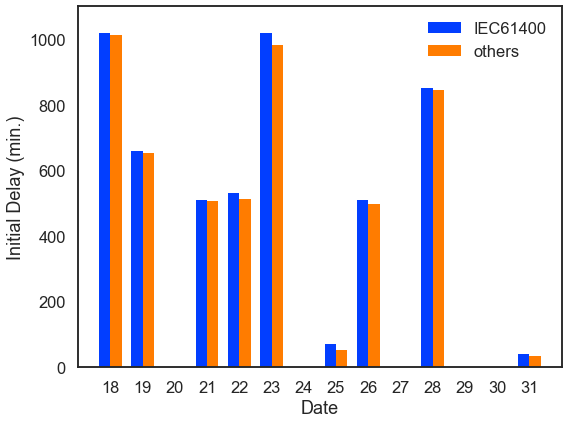

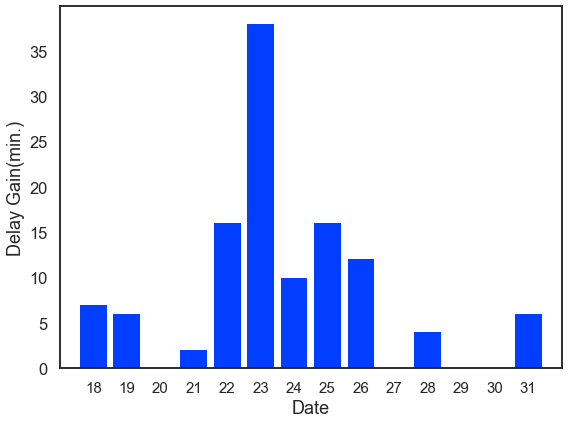

In [4]:
df['IEC_loss'] = df['IEC_init'] - df['date_init']
df['methods_loss'] = df['methods_init'] - df['date_init']
df['date'] = df.index + 18
df['delta_loss'] = df['IEC_init'] - df['methods_init']

X = df.index

width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(df['date']-width/2, df['IEC_loss'], width, label='IEC61400', linewidth=0)
rects2 = ax.bar(df['date']+width/2, df['methods_loss'], width, label='others', linewidth=0)

ax.set_ylabel('Initial Delay (min.)')
ax.set_xlabel('Date')
ax.set_xlim(17, 32)
ax.set_xticks(df['date'])
ax.set_ylim(0, 1100)
ax.legend()

fig.tight_layout()
plt.savefig('MethodsComp_InitialDelay.png')
plt.show()
plt.close()

#################

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df['date'], df['delta_loss'], linewidth=0)
ax.set_xlim(17, 32)
ax.set_ylabel('Delay Gain(min.)')
ax.set_xlabel('Date')
ax.set_xticks(df['date'])
ax.tick_params(axis='x', labelsize=15)

fig.tight_layout()
plt.savefig('MethodsComp_InitialDelayGain.png')
plt.show()
plt.close()

In [7]:
print(df['delta_loss'])

0      7.0
1      6.0
2      NaN
3      2.0
4     16.0
5     38.0
6     10.0
7     16.0
8     12.0
9      0.0
10     4.0
11     0.0
12     0.0
13     6.0
Name: delta_loss, dtype: float64


### 3.2. Duration Comparison : Data Required to construct Capture Matrix

In [8]:
df_dur = df[['IEC_dur', 'SS_dur', 'PSO_dur', 'Freq_dur', 'rand_on_dur', 'rand_off_dur', 'QL_on_dur', 'QL_off_dur']]
df_dur.describe()

,IEC_dur,SS_dur,PSO_dur,Freq_dur,rand_on_dur,rand_off_dur,QL_on_dur,QL_off_dur
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,19456.923077,17431.000000,16238.769231,15542.153846,18248.615385,17861.846154,17744.769231,17607.076923
std,4442.222388,2775.517159,2385.409404,2196.084350,3226.359159,2922.685490,2947.733512,2790.061363
min,12940.000000,12056.000000,11547.000000,11548.000000,12473.000000,12468.000000,12471.000000,12471.000000
25%,15670.000000,15724.000000,15253.000000,14225.000000,15723.000000,15668.000000,15268.000000,15671.000000
50%,19430.000000,18055.000000,16313.000000,15268.000000,19419.000000,18514.000000,18421.000000,18142.000000
75%,23690.000000,19188.000000,17981.000000,16556.000000,20904.000000,19791.000000,19865.000000,19784.000000
max,25550.000000,21003.000000,19610.000000,19610.000000,22197.000000,21243.000000,21233.000000,21240.000000


In [9]:
IEC = pd.DataFrame(df_dur['IEC_dur'])
IEC['hysteresis'] = 'OFF'
IEC['method'] = 'IEC61400-13'
SS = pd.DataFrame(df_dur['SS_dur'])
SS['hysteresis'] = 'OFF'
SS['method'] = 'Simple Stacking'
PSO = pd.DataFrame(df_dur['PSO_dur'])
PSO['hysteresis'] = 'OFF'
PSO['method'] = 'PSO'
Freq = pd.DataFrame(df_dur['Freq_dur'])
Freq['hysteresis'] = 'OFF'
Freq['method'] = 'Frequency'
rand_on = pd.DataFrame(df_dur['rand_on_dur'])
rand_on['hysteresis'] = 'ON'
rand_on['method'] = 'Q-Learning (random)'
rand_off = pd.DataFrame(df_dur['rand_off_dur'])
rand_off['hysteresis'] = 'OFF'
rand_off['method'] = 'Q-Learning (random)'
QL_on = pd.DataFrame(df_dur['QL_on_dur'])
QL_on['hysteresis'] = 'ON'
QL_on['method'] = 'Q-Learning (e-greedy)'
QL_off = pd.DataFrame(df_dur['QL_off_dur'])
QL_off['hysteresis'] = 'OFF'
QL_off['method'] = 'Q-Learning (e-greedy)'

IEC.rename(columns={'IEC_dur':'duration'}, inplace=True)
SS.rename(columns={'SS_dur':'duration'}, inplace=True)
PSO.rename(columns={'PSO_dur':'duration'}, inplace=True)
Freq.rename(columns={'Freq_dur':'duration'}, inplace=True)
rand_on.rename(columns={'rand_on_dur':'duration'}, inplace=True)
rand_off.rename(columns={'rand_off_dur':'duration'}, inplace=True)
QL_on.rename(columns={'QL_on_dur':'duration'}, inplace=True)
QL_off.rename(columns={'QL_off_dur':'duration'}, inplace=True)

In [10]:
df_comp = pd.concat([IEC, SS, PSO, Freq, rand_on, rand_off, QL_on, QL_off], axis=0, sort=False)
df2md(df_comp)

duration|hysteresis|method
---|---|---
25550.0|OFF|IEC61400-13
24130.0|OFF|IEC61400-13
|OFF|IEC61400-13
24880.0|OFF|IEC61400-13
23690.0|OFF|IEC61400-13
22250.0|OFF|IEC61400-13
20870.0|OFF|IEC61400-13
19430.0|OFF|IEC61400-13
18150.0|OFF|IEC61400-13
17110.0|OFF|IEC61400-13
15670.0|OFF|IEC61400-13
14270.0|OFF|IEC61400-13
14000.0|OFF|IEC61400-13
12940.0|OFF|IEC61400-13
20604.0|OFF|Simple Stacking
19164.0|OFF|Simple Stacking
|OFF|Simple Stacking
18055.0|OFF|Simple Stacking
19188.0|OFF|Simple Stacking
17748.0|OFF|Simple Stacking
21003.0|OFF|Simple Stacking
19563.0|OFF|Simple Stacking
18544.0|OFF|Simple Stacking
17164.0|OFF|Simple Stacking
15724.0|OFF|Simple Stacking
14324.0|OFF|Simple Stacking
13466.0|OFF|Simple Stacking
12056.0|OFF|Simple Stacking
19610.0|OFF|PSO
18170.0|OFF|PSO
|OFF|PSO
16284.0|OFF|PSO
19149.0|OFF|PSO
17709.0|OFF|PSO
16313.0|OFF|PSO
15306.0|OFF|PSO
17981.0|OFF|PSO
16693.0|OFF|PSO
15253.0|OFF|PSO
14228.0|OFF|PSO
12861.0|OFF|PSO
11547.0|OFF|PSO
19610.0|OFF|Frequency
18170.0|OFF|Frequency
|OFF|Frequency
15268.0|OFF|Frequency
15470.0|OFF|Frequency
14030.0|OFF|Frequency
16300.0|OFF|Frequency
14860.0|OFF|Frequency
17907.0|OFF|Frequency
16556.0|OFF|Frequency
15116.0|OFF|Frequency
14225.0|OFF|Frequency
12988.0|OFF|Frequency
11548.0|OFF|Frequency
21232.0|ON|Q-Learning (random)
20904.0|ON|Q-Learning (random)
|ON|Q-Learning (random)
20608.0|ON|Q-Learning (random)
19864.0|ON|Q-Learning (random)
22197.0|ON|Q-Learning (random)
21003.0|ON|Q-Learning (random)
19419.0|ON|Q-Learning (random)
18534.0|ON|Q-Learning (random)
17128.0|ON|Q-Learning (random)
15723.0|ON|Q-Learning (random)
14462.0|ON|Q-Learning (random)
13685.0|ON|Q-Learning (random)
12473.0|ON|Q-Learning (random)
21243.0|OFF|Q-Learning (random)
19791.0|OFF|Q-Learning (random)
|OFF|Q-Learning (random)
20617.0|OFF|Q-Learning (random)
19776.0|OFF|Q-Learning (random)
18425.0|OFF|Q-Learning (random)
20871.0|OFF|Q-Learning (random)
19566.0|OFF|Q-Learning (random)
18514.0|OFF|Q-Learning (random)
17102.0|OFF|Q-Learning (random)
15668.0|OFF|Q-Learning (random)
14487.0|OFF|Q-Learning (random)
13676.0|OFF|Q-Learning (random)
12468.0|OFF|Q-Learning (random)
21233.0|ON|Q-Learning (e-greedy)
19790.0|ON|Q-Learning (e-greedy)
|ON|Q-Learning (e-greedy)
20602.0|ON|Q-Learning (e-greedy)
19865.0|ON|Q-Learning (e-greedy)
18421.0|ON|Q-Learning (e-greedy)
20787.0|ON|Q-Learning (e-greedy)
19347.0|ON|Q-Learning (e-greedy)
18123.0|ON|Q-Learning (e-greedy)
16711.0|ON|Q-Learning (e-greedy)
15268.0|ON|Q-Learning (e-greedy)
14387.0|ON|Q-Learning (e-greedy)
13677.0|ON|Q-Learning (e-greedy)
12471.0|ON|Q-Learning (e-greedy)
21240.0|OFF|Q-Learning (e-greedy)
19791.0|OFF|Q-Learning (e-greedy)
|OFF|Q-Learning (e-greedy)
18082.0|OFF|Q-Learning (e-greedy)
19784.0|OFF|Q-Learning (e-greedy)
18332.0|OFF|Q-Learning (e-greedy)
20828.0|OFF|Q-Learning (e-greedy)
19390.0|OFF|Q-Learning (e-greedy)
18142.0|OFF|Q-Learning (e-greedy)
17085.0|OFF|Q-Learning (e-greedy)
15671.0|OFF|Q-Learning (e-greedy)
14384.0|OFF|Q-Learning (e-greedy)
13692.0|OFF|Q-Learning (e-greedy)
12471.0|OFF|Q-Learning (e-greedy)


#### 3.2.1 Violin plot: hysteresis ON and OFF
* `gridspec` : divide plot into subplot, with ratio control

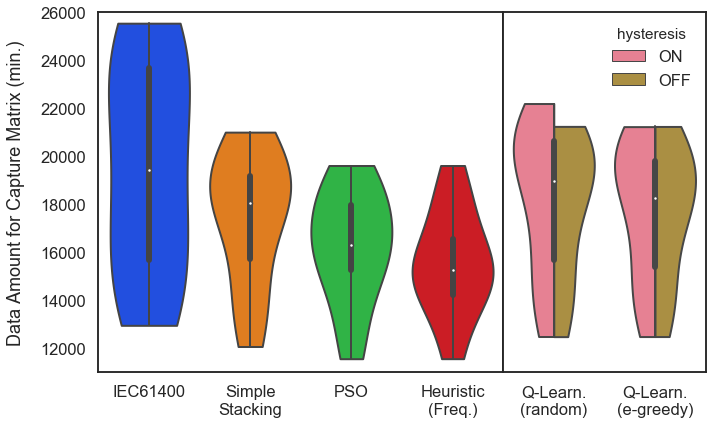

In [11]:
from matplotlib import gridspec

fig = plt.subplots(figsize=(10, 6), sharey=True)
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2,1], wspace=0)

# ax0
ax0 = plt.subplot(gs[0])
sns.violinplot(data=df_comp.iloc[:14*4],
               x='method', 
               y='duration',
               scale='count',
               linewidth=2,
               split=True,
               cut=0,
               z=0,
               ax=ax0)

ax0.set_xticklabels(['IEC61400', 'Simple\nStacking', 'PSO', 'Heuristic\n(Freq.)', 'Q-Learn.\n(random)', 'Q-Learn.\n(e-greedy)'])
ax0.set_xlabel('')
ax0.set_ylabel('Data Amount for Capture Matrix (min.)', labelpad=15)
ax0.set_ylim([11000, 26000])

# ax1
ax1 = plt.subplot(gs[1])

with sns.color_palette("husl"):
  sns.violinplot(data=df_comp.iloc[14*4:],
                 x='method', 
                 y='duration',
                 hue='hysteresis',
                 scale='count',
                 linewidth=2,
                 split=True,
                 cut=0,
                 z=0,
                 ax=ax1)
  
ax1.set_xticklabels(['Q-Learn.\n(random)', 'Q-Learn.\n(e-greedy)'])
ax1.set_xlabel('')
ax1.set_ylim([11000, 26000])
ax1.set_yticklabels('')
ax1.set_ylabel('')

plt.subplots_adjust(wspace=0, left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.tight_layout()
plt.savefig('MethodsComp_DataAmount.png')
plt.show()


#### 3.2.2 Violin plot with Scatter & Line plot : raw data

In [12]:
df2md(df_dur.head())

IEC_dur|SS_dur|PSO_dur|Freq_dur|rand_on_dur|rand_off_dur|QL_on_dur|QL_off_dur
---|---|---|---|---|---|---|---
25550.0|20604.0|19610.0|19610.0|21232.0|21243.0|21233.0|21240.0
24130.0|19164.0|18170.0|18170.0|20904.0|19791.0|19790.0|19791.0
|||||||
24880.0|18055.0|16284.0|15268.0|20608.0|20617.0|20602.0|18082.0
23690.0|19188.0|19149.0|15470.0|19864.0|19776.0|19865.0|19784.0


In [13]:
df_dur_off = df_dur.drop(['rand_on_dur', 'QL_on_dur'], axis=1)
df2md(df_dur_off.head())

IEC_dur|SS_dur|PSO_dur|Freq_dur|rand_off_dur|QL_off_dur
---|---|---|---|---|---
25550.0|20604.0|19610.0|19610.0|21243.0|21240.0
24130.0|19164.0|18170.0|18170.0|19791.0|19791.0
|||||
24880.0|18055.0|16284.0|15268.0|20617.0|18082.0
23690.0|19188.0|19149.0|15470.0|19776.0|19784.0


In [14]:
from matplotlib.collections import LineCollection

df_comp_off = df_comp[df_comp['hysteresis'] != 'ON']
df_paper = df_comp[df_comp['method'] != 'Q-Learning (random)']
df_paper_g = df_paper.groupby('method').mean().reset_index()
df2md(df_paper_g)

df_paper_g = df_paper_g.reindex([1, 4, 0, 3, 2]).reset_index(drop=True)
df2md(df_paper_g)


method|duration
---|---
Frequency|15542.153846153846
IEC61400-13|19456.923076923078
PSO|16238.76923076923
Q-Learning (e-greedy)|17675.923076923078
Simple Stacking|17431.0


method|duration
---|---
IEC61400-13|19456.923076923078
Simple Stacking|17431.0
Frequency|15542.153846153846
Q-Learning (e-greedy)|17675.923076923078
PSO|16238.76923076923


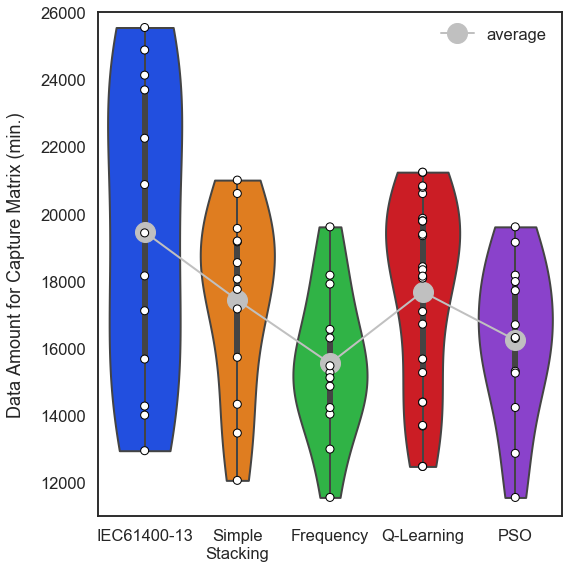

In [15]:
fig, ax = plt.subplots(figsize=(8, 8), sharey=True)

sns.violinplot(data=df_paper,
               x='method', 
               y='duration',
               scale='width',
               linewidth=2,
               split=True,
               cut=0,
               z=0,
               order=['IEC61400-13', 'Simple Stacking', 'Frequency', 'Q-Learning (e-greedy)', 'PSO'],
               ax=ax)

sns.stripplot(data=df_paper,
               x='method', 
               y='duration',
             jitter=False,
             color='white',
             edgecolor='black',
             linewidth=1,
              order=['IEC61400-13', 'Simple Stacking', 'Frequency', 'Q-Learning (e-greedy)', 'PSO'],
             size=8)

# Average 
avg_x = df_paper_g['method']
avg_y = df_paper_g['duration']
ax.plot(avg_x, avg_y, 'o-', linewidth=2, color='silver', label='average', ms=20)

ax.set_xticklabels(['IEC61400-13', 'Simple\nStacking', 'Frequency', 'Q-Learning', 'PSO'])
ax.set_xlabel('')
ax.set_ylabel('Data Amount for Capture Matrix (min.)', labelpad=15)
ax.set_ylim([11000, 26000])

ax.set_xlim([-0.5, 4.5])

plt.subplots_adjust(left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.tight_layout()
plt.legend()
plt.savefig('MethodsComp_DataAmount_off_line.png')
plt.show()


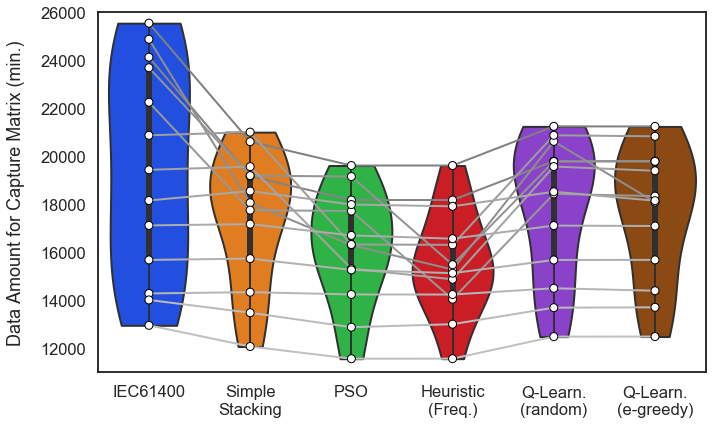

In [17]:
fig, ax = plt.subplots(figsize=(10, 6), sharey=True)

sns.violinplot(data=df_comp_off,
               x='method', 
               y='duration',
               scale='count',
               linewidth=2,
               split=True,
               cut=0,
               z=0,
               ax=ax)

sns.stripplot(data=df_comp_off,
               x='method', 
               y='duration',
             jitter=False,
             color='white',
             edgecolor='black',
             linewidth=1,
             size=8)

for i in range(df_dur_off.shape[0]):
  color = plt.cm.gray(i/DATEMAX/4+0.5)
  ax.plot(df_dur_off.columns.tolist(), df_dur_off.iloc[i].tolist(), linewidth=2, color=color)

ax.set_xticklabels(['IEC61400', 'Simple\nStacking', 'PSO', 'Heuristic\n(Freq.)', 'Q-Learn.\n(random)', 'Q-Learn.\n(e-greedy)'])
ax.set_xlabel('')
ax.set_ylabel('Data Amount for Capture Matrix (min.)', labelpad=15)
ax.set_ylim([11000, 26000])
ax.set_xlim([-0.5, 5.5])

plt.subplots_adjust(left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.tight_layout()
plt.savefig('MethodsComp_DataAmount_off_line.png')
plt.show()


### 3.3. Duration Gain Comparison : Reduced data to construct Capture Matrix

In [18]:
df2md(df)

date_init|IEC_init|IEC_fin|IEC_dur|methods_init|SS_fin|SS_dur|PSO_fin|PSO_dur|Freq_fin|Freq_dur|rand_on_fin|rand_on_dur|rand_off_fin|rand_off_dur|QL_on_fin|QL_on_dur|QL_off_fin|QL_off_dur|IEC_loss|methods_loss|date|delta_loss
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|1020.0|25550.0|25550.0|1013.0|20604.0|20604.0|19610.0|19610.0|19610.0|19610.0|21232.0|21232.0|21243.0|21243.0|21233.0|21233.0|21240.0|21240.0|1020.0|1013.0|18|7.0
1440|2100.0|25570.0|24130.0|2094.0|20604.0|19164.0|19610.0|18170.0|19610.0|18170.0|22344.0|20904.0|21231.0|19791.0|21230.0|19790.0|21231.0|19791.0|660.0|654.0|19|6.0
2880|||||||||||||||||||||20|
4320|4830.0|29200.0|24880.0|4828.0|22375.0|18055.0|20604.0|16284.0|19588.0|15268.0|24928.0|20608.0|24937.0|20617.0|24922.0|20602.0|22402.0|18082.0|510.0|508.0|21|2.0
5760|6290.0|29450.0|23690.0|6274.0|24948.0|19188.0|24909.0|19149.0|21230.0|15470.0|25624.0|19864.0|25536.0|19776.0|25625.0|19865.0|25544.0|19784.0|530.0|514.0|22|16.0
7200|8220.0|29450.0|22250.0|8182.0|24948.0|17748.0|24909.0|17709.0|21230.0|14030.0|29397.0|22197.0|25625.0|18425.0|25621.0|18421.0|25532.0|18332.0|1020.0|982.0|23|38.0
8640|8640.0|29510.0|20870.0|8630.0|29643.0|21003.0|24953.0|16313.0|24940.0|16300.0|29643.0|21003.0|29511.0|20871.0|29427.0|20787.0|29468.0|20828.0|0.0|-10.0|24|10.0
10080|10150.0|29510.0|19430.0|10134.0|29643.0|19563.0|25386.0|15306.0|24940.0|14860.0|29499.0|19419.0|29646.0|19566.0|29427.0|19347.0|29470.0|19390.0|70.0|54.0|25|16.0
11520|12030.0|29670.0|18150.0|12018.0|30064.0|18544.0|29501.0|17981.0|29427.0|17907.0|30054.0|18534.0|30034.0|18514.0|29643.0|18123.0|29662.0|18142.0|510.0|498.0|26|12.0
12950|12950.0|30060.0|17110.0|12950.0|30114.0|17164.0|29643.0|16693.0|29506.0|16556.0|30078.0|17128.0|30052.0|17102.0|29661.0|16711.0|30035.0|17085.0|0.0|0.0|27|0.0
14390|15240.0|30060.0|15670.0|15236.0|30114.0|15724.0|29643.0|15253.0|29506.0|15116.0|30113.0|15723.0|30058.0|15668.0|29658.0|15268.0|30061.0|15671.0|850.0|846.0|28|4.0
15830|15830.0|30100.0|14270.0|15830.0|30154.0|14324.0|30058.0|14228.0|30055.0|14225.0|30292.0|14462.0|30317.0|14487.0|30217.0|14387.0|30214.0|14384.0|0.0|0.0|29|0.0
17270|17270.0|31270.0|14000.0|17270.0|30736.0|13466.0|30131.0|12861.0|30258.0|12988.0|30955.0|13685.0|30946.0|13676.0|30947.0|13677.0|30962.0|13692.0|0.0|0.0|30|0.0
18710|18750.0|31650.0|12940.0|18744.0|30766.0|12056.0|30257.0|11547.0|30258.0|11548.0|31183.0|12473.0|31178.0|12468.0|31181.0|12471.0|31181.0|12471.0|40.0|34.0|31|6.0


In [19]:
df_gain = pd.DataFrame()
df_gain['SS'] = df['IEC_fin'] - df['SS_fin']
df_gain['PSO'] = df['IEC_fin'] - df['PSO_fin']
df_gain['Freq'] = df['IEC_fin'] - df['Freq_fin']
df_gain['QL_rand'] = df['IEC_fin'] - df['rand_off_fin']
df_gain['QL_egreedy'] = df['IEC_fin'] - df['QL_off_fin']

df_gain = df_gain.drop(2, axis=0).astype('int')

df_gain_summary = df_gain.describe()
df2md(df_gain_summary)

df2md(df_gain)

SS|PSO|Freq|QL_rand|QL_egreedy
---|---|---|---|---
13.0|13.0|13.0|13.0|13.0
2025.923076923077|3218.153846153846|3914.769230769231|1595.076923076923|1849.8461538461538
2648.1116372973675|2779.277359499343|3470.2139980565603|2100.610128095266|2416.4395242502915
-394.0|42.0|45.0|-364.0|-114.0
-54.0|417.0|554.0|-1.0|25.0
534.0|4124.0|4570.0|324.0|308.0
4502.0|4557.0|5960.0|3914.0|3918.0
6825.0|8596.0|9612.0|4339.0|6798.0


SS|PSO|Freq|QL_rand|QL_egreedy
---|---|---|---|---
4946|5940|5940|4307|4310
4966|5960|5960|4339|4339
6825|8596|9612|4263|6798
4502|4541|8220|3914|3906
4502|4541|8220|3825|3918
-133|4557|4570|-1|42
-133|4124|4570|-136|40
-394|169|243|-364|8
-54|417|554|8|25
-54|417|554|2|-1
-54|42|45|-217|-114
534|1139|1012|324|308
884|1393|1392|472|469


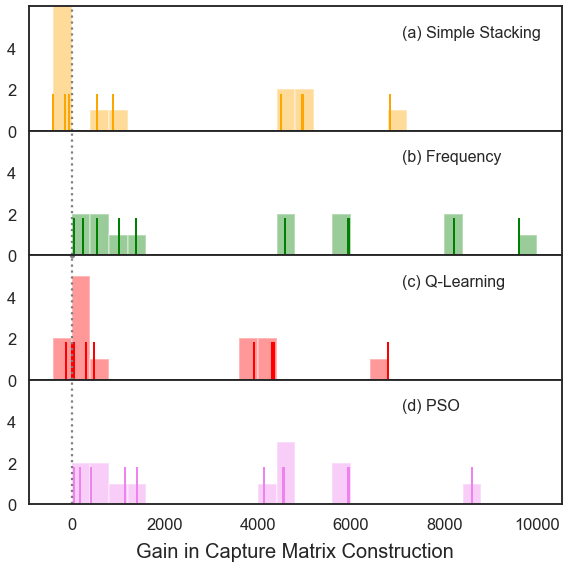

In [20]:
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(8, 8), sharex=True, gridspec_kw={'hspace': 0})

bins = np.linspace(-400, 10000, 27)
sns.distplot(df_gain['SS'], kde=False, bins=bins, color='orange', 
             rug=True, rug_kws={"height":0.3, "linewidth": 2}, ax=axes[0])
sns.distplot(df_gain['Freq'], kde=False, bins=bins, color='green',
             rug=True, rug_kws={"height":0.3, "linewidth": 2}, ax=axes[1])
sns.distplot(df_gain['QL_egreedy'], kde=False, bins=bins, color='red',
             rug=True, rug_kws={"height":0.3, "linewidth": 2}, ax=axes[2])
sns.distplot(df_gain['PSO'], kde=False, bins=bins, color='violet',
             rug=True, rug_kws={"height":0.3, "linewidth": 2}, ax=axes[3])

axes[0].plot([0,0], [0,6], ':', color='gray')
axes[1].plot([0,0], [0,6], ':', color='gray')
axes[2].plot([0,0], [0,6], ':.', color='gray')
axes[3].plot([0,0], [0,6], ':', color='gray')

for i in range(4):
  axes[i].set_ylim(0, 6)
  axes[i].set_yticks([0, 2, 4])

boxprops = dict(boxstyle='round', facecolor='white', alpha=0)
text_x = 0.7
text_y = 0.85
axes[0].text(text_x, text_y, '(a) Simple Stacking', transform=axes[0].transAxes, fontsize=16, verticalalignment='top', bbox=boxprops)
axes[1].text(text_x, text_y, '(b) Frequency', transform=axes[1].transAxes, fontsize=16, verticalalignment='top', bbox=boxprops)
axes[2].text(text_x, text_y, '(c) Q-Learning', transform=axes[2].transAxes, fontsize=16, verticalalignment='top', bbox=boxprops)
axes[3].text(text_x, text_y, '(d) PSO', transform=axes[3].transAxes, fontsize=16, verticalalignment='top', bbox=boxprops)

axes[3].set_xlabel('Gain in Capture Matrix Construction', labelpad = 10, fontsize=20)

fig.align_ylabels()
plt.subplots_adjust(left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.tight_layout()
plt.savefig('MethodsComp_Gain.png')
